In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gc
%matplotlib inline

In [3]:
train = np.load('../../data/train_sans_ocean.npy')
train.shape

(26378244, 38)

In [4]:
pixels = train.shape[0]//108
spatial = np.reshape(train,(pixels,9,12,train.shape[1]))
#converts the array into 3D, first is all pixels, second is time steps and thrid is features


The array is structured as (pixels,years,months,features)

In [5]:
spatial.shape

(244243, 9, 12, 38)

In [7]:
ign = spatial[:,0:,0:,15]


In [8]:
ign.shape

(244243, 9, 12)

In [12]:
ign[:,0:,1].shape

(244243, 9)

Index(['lat 0', 'lon 1', 'time 2', 'agb 3', 'pft_fracCover 4', 'sm 5', 'pftCrop 6',
       'pftHerb 7', 'pftShrubBD 8', 'pftShrubNE 9', 'pftTreeBD 10', 'pftTreeBE 11',
       'pftTreeND 12', 'pftTreeNE 13', 'GDP 14', 'ign 15', 'Distance_to_populated_areas 16',
       'fPAR 17', 'LAI 18', 'NLDI 19', 'vod_K_anomalies 20', 'FPAR_12mon 21', 'LAI_12mon 22',
       'Vod_k_anomaly_12mon 23', 'FPAR_06mon 24', 'LAI_06mon 25', 'Vod_k_anomaly_06mon 26',
       'WDPA_fracCover 27', 'dtr 28', 'pet 29', 'tmx 30', 'wet 31', 'Biome 32', 'precip 33',
       'Livestock 34', 'road_density 35', 'topo 36', 'pop_density 37'],
      dtype='object')

In [106]:
ign.shape

(244243, 9, 12)

In [115]:
ign_mean = np.nanmean(ign,axis=1)

/tmp/ipykernel_733436/1876977266.py:1: RuntimeWarning: Mean of empty slice
  ign_mean = np.nanmean(ign,axis=1)


In [116]:
ign_mean.shape

(244243, 12)

In [119]:
np.nan_to_num(ign_mean,copy = False,nan=0)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [126]:
ign_mean

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [121]:
import seaborn as sns


<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

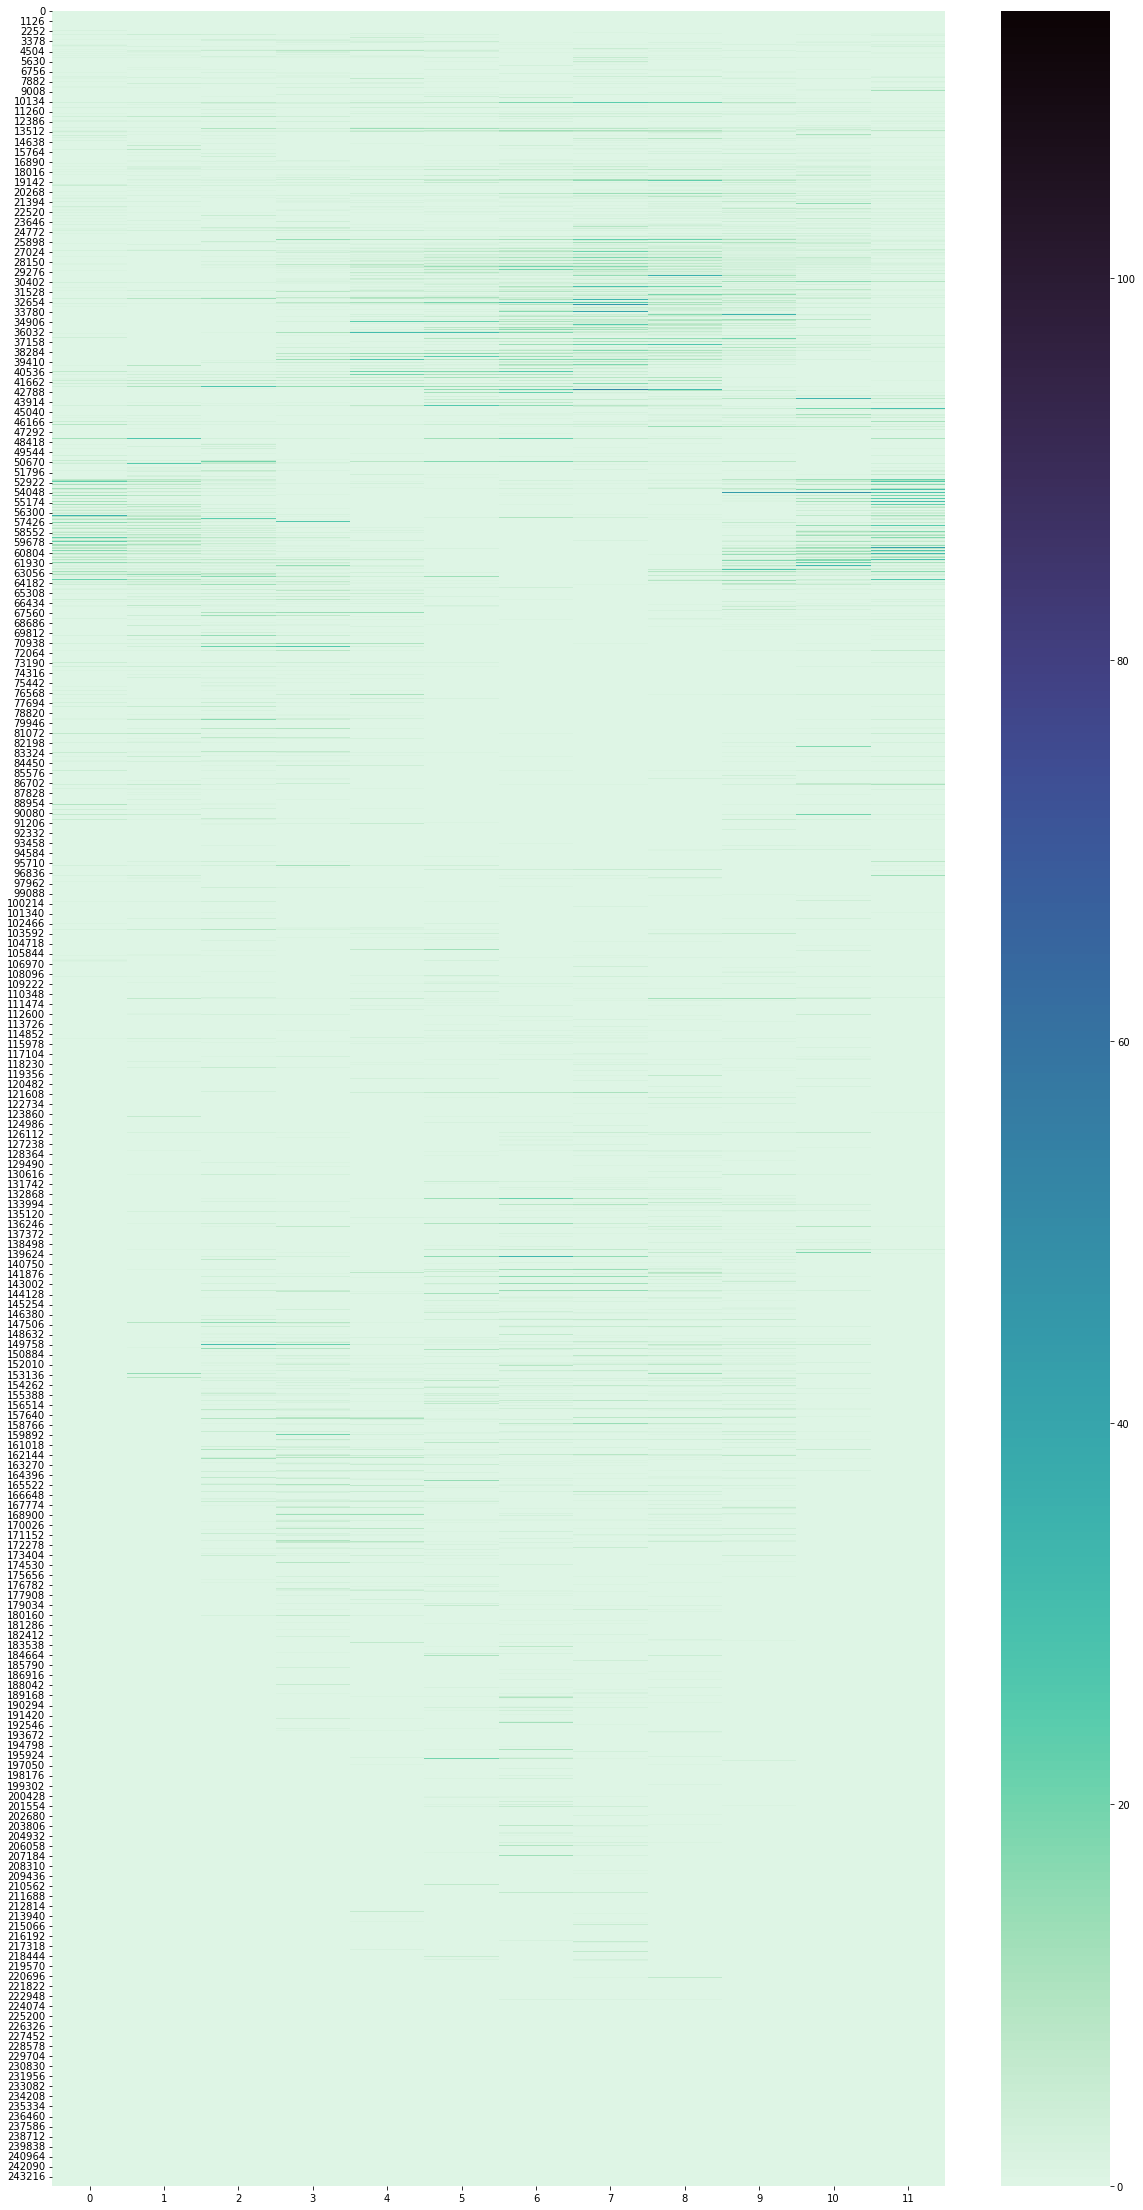

In [134]:
plt.rcParams["figure.figsize"] = (20,40)
ax = sns.heatmap(ign_mean,cmap = "mako_r")
plt.show()

In [124]:
np.max(ign_mean)

114.0

(array([[2.33401e+05, 4.51400e+03, 2.02400e+03, 1.23200e+03, 7.66000e+02,
         6.04000e+02, 4.15000e+02, 3.07000e+02, 2.28000e+02, 2.09000e+02,
         1.54000e+02, 1.19000e+02, 7.90000e+01, 5.70000e+01, 3.40000e+01,
         3.20000e+01, 1.60000e+01, 8.00000e+00, 4.00000e+00, 9.00000e+00,
         9.00000e+00, 5.00000e+00, 5.00000e+00, 4.00000e+00, 3.00000e+00,
         0.00000e+00, 2.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
        [2.31216e+05, 6.07500e+03, 2.64700e+03, 1.59600e+03, 9.01000e+02,
         5.98000e+02, 4.13000e+02, 2.38000e+02, 1.85000e+02, 1.12000e+02,
         9.40000e+01, 6.20000e+01, 3.20000e+01, 2.50000e+01, 1.40000e+01,
         1.10000e+01, 8.00000e+00, 8.

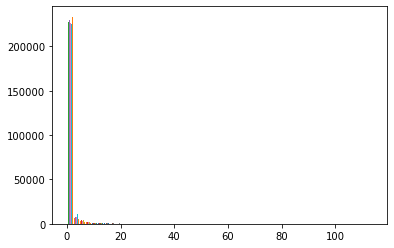

In [125]:
plt.hist(ign_mean,bins= 50)


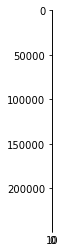

In [118]:
plt.imshow(ign_mean)
plt.show()

Looking how to split an array into 3D, look if the time dimension is preserved, because reshape doesn't transform the matrix, use transpose etc to do that

In [3]:
arr = np.arange(105)
arr = np.reshape(arr, (21,5))
arr.shape

(21, 5)

In [ ]:
arr

In [5]:
arr1 = np.reshape(arr,(-1,3,5))

In [6]:
arr1.shape

(7, 3, 5)

In [ ]:
arr1

In [8]:
arr1[0,::]

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [10]:
arr1[:,0,:]

array([[ 0,  1,  2,  3,  4],
       [15, 16, 17, 18, 19],
       [30, 31, 32, 33, 34],
       [45, 46, 47, 48, 49],
       [60, 61, 62, 63, 64],
       [75, 76, 77, 78, 79],
       [90, 91, 92, 93, 94]])

In [16]:
test = arr1[:,0,:]

In [17]:
test.shape

(7, 5)

In [18]:
test

array([[ 0,  1,  2,  3,  4],
       [15, 16, 17, 18, 19],
       [30, 31, 32, 33, 34],
       [45, 46, 47, 48, 49],
       [60, 61, 62, 63, 64],
       [75, 76, 77, 78, 79],
       [90, 91, 92, 93, 94]])

In [20]:
test[:,0]

array([ 0, 15, 30, 45, 60, 75, 90])

In [21]:
test1 = (arr1[:,0,:])[:,0]
test1

array([ 0, 15, 30, 45, 60, 75, 90])

In [22]:
arr1[:,0,:][:,0]

array([ 0, 15, 30, 45, 60, 75, 90])

This will convert the array into a 4D one, so that I have all the years stacked up

In [16]:
import numpy as np
arr = np.empty((90,2),dtype=np.int16)

In [17]:
arr = np.empty((90,2),dtype=np.int16)
c = range(2,12,1)
first = True
pixel = 0
t_res = 6 #temporal resolution
for i in c:
    temp = range(i,i*7,i)
    #print(temp)
    if (i%2==0):
        col = 0
        if (first==False):
            pixel = pixel+1
            #print(pixel,"pixel")
    else:
        col = 1
        first = False
    row = pixel*18
    for j in temp:
        #print(row,col,j)
        arr[row][col]=j
        arr[row+t_res][col]=j
        arr[row+t_res*2][col]=j
        row = row+1 


In [18]:
arr_ = np.reshape(arr,(5,-1,2))


In [31]:
arr_[0]

array([[ 2,  3],
       [ 4,  6],
       [ 6,  9],
       [ 8, 12],
       [10, 15],
       [12, 18],
       [ 2,  3],
       [ 4,  6],
       [ 6,  9],
       [ 8, 12],
       [10, 15],
       [12, 18],
       [ 2,  3],
       [ 4,  6],
       [ 6,  9],
       [ 8, 12],
       [10, 15],
       [12, 18]], dtype=int16)

In [33]:
block = np.zeros((5,6,2))
block[:] = np.nan
arr_new = np.append(arr_,block,axis = 1)
arr_new[0]

array([[ 2.,  3.],
       [ 4.,  6.],
       [ 6.,  9.],
       [ 8., 12.],
       [10., 15.],
       [12., 18.],
       [ 2.,  3.],
       [ 4.,  6.],
       [ 6.,  9.],
       [ 8., 12.],
       [10., 15.],
       [12., 18.],
       [ 2.,  3.],
       [ 4.,  6.],
       [ 6.,  9.],
       [ 8., 12.],
       [10., 15.],
       [12., 18.],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan]])

In [34]:
arr_new = np.reshape(arr_new,(5,4,6,2))

In [35]:
arr_new[0,::,0:]

array([[[ 2.,  3.],
        [ 4.,  6.],
        [ 6.,  9.],
        [ 8., 12.],
        [10., 15.],
        [12., 18.]],

       [[ 2.,  3.],
        [ 4.,  6.],
        [ 6.,  9.],
        [ 8., 12.],
        [10., 15.],
        [12., 18.]],

       [[ 2.,  3.],
        [ 4.,  6.],
        [ 6.,  9.],
        [ 8., 12.],
        [10., 15.],
        [12., 18.]],

       [[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]]])

In [26]:
arr_[:,0][:,0]

array([ 2,  4,  6,  8, 10], dtype=int16)

In [6]:
arr_new = np.reshape(arr,(5,3,-1,2))
arr_new

array([[[[ 2,  3],
         [ 4,  6],
         [ 6,  9],
         [ 8, 12],
         [10, 15],
         [12, 18]],

        [[ 2,  3],
         [ 4,  6],
         [ 6,  9],
         [ 8, 12],
         [10, 15],
         [12, 18]],

        [[ 2,  3],
         [ 4,  6],
         [ 6,  9],
         [ 8, 12],
         [10, 15],
         [12, 18]]],


       [[[ 4,  5],
         [ 8, 10],
         [12, 15],
         [16, 20],
         [20, 25],
         [24, 30]],

        [[ 4,  5],
         [ 8, 10],
         [12, 15],
         [16, 20],
         [20, 25],
         [24, 30]],

        [[ 4,  5],
         [ 8, 10],
         [12, 15],
         [16, 20],
         [20, 25],
         [24, 30]]],


       [[[ 6,  7],
         [12, 14],
         [18, 21],
         [24, 28],
         [30, 35],
         [36, 42]],

        [[ 6,  7],
         [12, 14],
         [18, 21],
         [24, 28],
         [30, 35],
         [36, 42]],

        [[ 6,  7],
         [12, 14],
         [18, 21],
         [2

In [12]:
arr_new[:,0]

array([[[ 2,  3],
        [ 4,  6],
        [ 6,  9],
        [ 8, 12],
        [10, 15],
        [12, 18]],

       [[ 4,  5],
        [ 8, 10],
        [12, 15],
        [16, 20],
        [20, 25],
        [24, 30]],

       [[ 6,  7],
        [12, 14],
        [18, 21],
        [24, 28],
        [30, 35],
        [36, 42]],

       [[ 8,  9],
        [16, 18],
        [24, 27],
        [32, 36],
        [40, 45],
        [48, 54]],

       [[10, 11],
        [20, 22],
        [30, 33],
        [40, 44],
        [50, 55],
        [60, 66]]], dtype=int16)

In [13]:
arr_new[:,0].shape

(5, 6, 2)

In [18]:
arr_new[:,0][0]

array([[ 2,  3],
       [ 4,  6],
       [ 6,  9],
       [ 8, 12],
       [10, 15],
       [12, 18]], dtype=int16)

In [ ]:
arr_new[3]#indexing the array as arr[i] gives me a certain pixwl with all its features and all the time steps

In [47]:
arr_new[0,::,0:,0]

array([[ 4,  6,  8, 10, 12],
       [ 4,  6,  8, 10, 12],
       [ 4,  6,  8, 10, 12]], dtype=int16)

The array is structured as (pixels,years,months,features)

In [100]:
arr_new[0,::,0:,0]#Doing this gives me all the months in all the years
#What I want is all the years, like month 1, all years
#Changing the alst zero gives me the features

array([[ 2,  4,  6,  8, 10, 12],
       [ 2,  4,  6,  8, 10, 12],
       [ 2,  4,  6,  8, 10, 12]], dtype=int16)

In [88]:
f1 = arr_new[::,0:,0]

In [101]:
arr_new[1,::,0:,0]

array([[ 4,  8, 12, 16, 20, 24],
       [ 4,  8, 12, 16, 20, 24],
       [ 4,  8, 12, 16, 20, 24]], dtype=int16)

In [104]:
arr_new[:,0:,0:,1]

array([[[ 3,  6,  9, 12, 15, 18],
        [ 3,  6,  9, 12, 15, 18],
        [ 3,  6,  9, 12, 15, 18]],

       [[ 5, 10, 15, 20, 25, 30],
        [ 5, 10, 15, 20, 25, 30],
        [ 5, 10, 15, 20, 25, 30]],

       [[ 7, 14, 21, 28, 35, 42],
        [ 7, 14, 21, 28, 35, 42],
        [ 7, 14, 21, 28, 35, 42]],

       [[ 9, 18, 27, 36, 45, 54],
        [ 9, 18, 27, 36, 45, 54],
        [ 9, 18, 27, 36, 45, 54]],

       [[11, 22, 33, 44, 55, 66],
        [11, 22, 33, 44, 55, 66],
        [11, 22, 33, 44, 55, 66]]], dtype=int16)

In [107]:
arr_new[:,0:,0:,0].shape

(5, 3, 6)

In [108]:
np.nanmean(arr_new[:,0:,0:,0],axis=1)

array([[ 2.,  4.,  6.,  8., 10., 12.],
       [ 4.,  8., 12., 16., 20., 24.],
       [ 6., 12., 18., 24., 30., 36.],
       [ 8., 16., 24., 32., 40., 48.],
       [10., 20., 30., 40., 50., 60.]])

In [89]:
f1.shape

(5, 3, 2)

In [90]:
np.nanmean(f1,axis = 1)

array([[ 2.,  3.],
       [ 4.,  5.],
       [ 6.,  7.],
       [ 8.,  9.],
       [10., 11.]])

(_,9,12)

The array is structured as (pixels,years,months,features)

In [93]:
arr_new[0,::,0:,1]

array([[ 3,  6,  9, 12, 15, 18],
       [ 3,  6,  9, 12, 15, 18],
       [ 3,  6,  9, 12, 15, 18]], dtype=int16)

So what we change is the first index to get every pixel, and we change the last index to get all the features, but I don't need for all features, now do I, at least plotting over all feautes is not required, but maybe calculating the average, median, sd etc would be a good idea would be a good idea

In [63]:
arr_new[0,::,0:,0][:,0]#Changing the last zero in the second bracket gives in months over time

array([8, 8, 8], dtype=int16)

In [ ]:
arr_new[::,0:,0]

In [57]:
arr_new[0,::,0:,0].shape

(3, 6)

In [10]:
test = np.arange(12)
test = np.reshape(test,(6,-1))
test

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])

In [12]:
temp = range(2,14,2)
c = 0
for i in temp:
    test[c][0]=i
    c=c+1
test

array([[ 2,  1],
       [ 4,  3],
       [ 6,  5],
       [ 8,  7],
       [10,  9],
       [12, 11]])

Creating a 2D array and filling in zeros at first, then filling in the valid values for other variables

In [51]:
import numpy as np
x = np.linspace(-89.5,90,720)
y = np.linspace(-179.5,180,1440)
lons,lats = np.meshgrid(y,x)
grid = np.zeros((720,1440))


In [52]:
x_idx = ((x+89.5)*4).astype(int)
y_idx = ((y+179.5)*4).astype(int)


In [2]:
import matplotlib.pyplot as plt
import gc
%matplotlib inline
train = np.load('../../data/train_sans_ocean.npy')
pixels = train.shape[0]//108
spatial = np.reshape(train,(pixels,9,12,train.shape[1]))#converts the array into 3D, first is all pixels, second is time steps and thrid is features
ign = spatial[:,0:,0:,15]
lat = spatial[:,0:,0:,0]
lon = spatial[:,0:,0:,1]
ign_mean = np.nanmean(ign,axis=1)
lat = np.mean(lat,axis =1)
lon = np.mean(lon,axis = 1)
del(train)
del(ign)
gc.collect()

/tmp/ipykernel_2333270/3505457770.py:10: RuntimeWarning: Mean of empty slice
  ign_mean = np.nanmean(ign,axis=1)


15

In [3]:
spatial.shape

(244243, 9, 12, 38)

In [8]:
var = spatial[:,0:,0:,15]
var.shape

(244243, 9, 12)

In [9]:
inds = np.where(np.isnan(var))
spatial[:,0:,0:,0][inds].shape

(25037988,)

In [54]:
ign_mean.shape

(244243, 12)

In [55]:
lat.shape

(244243, 12)

In [56]:
grid.shape

(720, 1440)

In [57]:
lats.shape

(720, 1440)

In [65]:
jan = ign_mean[:,0].reshape((-1,1))
jan = np.append(lon[:,0].reshape(-1,1),jan,axis = 1)
jan = np.append(lat[:,0].reshape(-1,1),jan,axis = 1)

In [66]:
jan.shape

(244243, 3)

In [67]:
jan = jan[~np.isnan(jan).any(axis =1)]
jan.shape

(23129, 3)

In [79]:
#np.nan_to_num(ign_mean,copy = False,nan = 0)
grid = np.zeros((720,1440))
for i in range(jan.shape[0]):
    print(jan[:,0][i],jan[:,1][i])
    print((jan[:,0][i]+89.5)*4,(jan[:,1][i]+179.5)*4)
    grid[int(jan[:,0][i]+89.5)*4][int(jan[:,1][i]+179.5)*4] = jan[:,2][i]


-51.75 -61.0
151.0 474.0
-49.75 -72.75
159.0 427.0
-49.75 -71.25
159.0 433.0
-49.5 -71.0
160.0 434.0
-49.5 -67.75
160.0 447.0
-49.25 -72.5
161.0 428.0
-49.25 -72.25
161.0 429.0
-49.25 -72.0
161.0 430.0
-49.0 -72.5
162.0 428.0
-48.5 -72.0
164.0 430.0
-48.5 -71.75
164.0 431.0
-48.5 -71.5
164.0 432.0
-48.5 -70.0
164.0 438.0
-48.5 -69.75
164.0 439.0
-48.25 -72.0
165.0 430.0
-48.25 -69.0
165.0 442.0
-48.0 -72.0
166.0 430.0
-48.0 -70.5
166.0 436.0
-48.0 -68.0
166.0 446.0
-48.0 -66.75
166.0 451.0
-48.0 -66.0
166.0 454.0
-47.75 -71.75
167.0 431.0
-47.75 -71.5
167.0 432.0
-47.75 -68.0
167.0 446.0
-47.5 -72.0
168.0 430.0
-47.5 -71.75
168.0 431.0
-47.5 -71.5
168.0 432.0
-47.5 -68.0
168.0 446.0
-47.5 -67.75
168.0 447.0
-47.25 -71.5
169.0 432.0
-47.25 -68.25
169.0 445.0
-47.0 -72.0
170.0 430.0
-47.0 -71.75
170.0 431.0
-47.0 -71.5
170.0 432.0
-46.75 -72.0
171.0 430.0
-46.75 -71.75
171.0 431.0
-46.75 -71.5
171.0 432.0
-46.75 -68.75
171.0 443.0
-46.5 -71.75
172.0 431.0
-46.5 -67.25
172.0 449.0
-46.25 

In [69]:
grid.shape

(720, 1440)

In [70]:
lats.shape

(720, 1440)

In [71]:
lons

array([[-179.5       , -179.25017373, -179.00034746, ...,  179.50034746,
         179.75017373,  180.        ],
       [-179.5       , -179.25017373, -179.00034746, ...,  179.50034746,
         179.75017373,  180.        ],
       [-179.5       , -179.25017373, -179.00034746, ...,  179.50034746,
         179.75017373,  180.        ],
       ...,
       [-179.5       , -179.25017373, -179.00034746, ...,  179.50034746,
         179.75017373,  180.        ],
       [-179.5       , -179.25017373, -179.00034746, ...,  179.50034746,
         179.75017373,  180.        ],
       [-179.5       , -179.25017373, -179.00034746, ...,  179.50034746,
         179.75017373,  180.        ]])

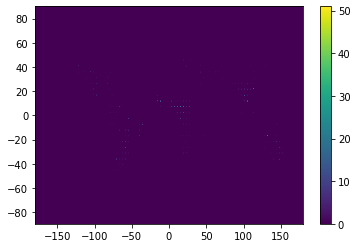

In [80]:
import matplotlib.pyplot as plt
#plt.style.use(['science','notebook','dark_background'])
plt.pcolormesh(lons,lats,grid)
plt.colorbar()
plt.show()

<AxesSubplot:>

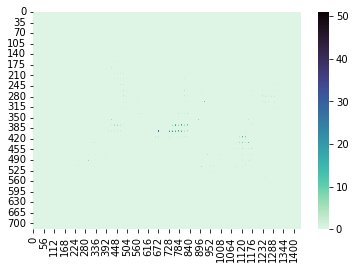

In [82]:
import seaborn as sns
sns.heatmap(grid,cmap = "mako_r")

In [23]:
test = np.arange(10)
test = test.reshape((5,2))
test

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [26]:
test = np.append([[0],[0],[0],[0],[0]],test,axis = 1)
test

array([[0, 0, 1],
       [0, 2, 3],
       [0, 4, 5],
       [0, 6, 7],
       [0, 8, 9]])

In [27]:
test[:,2][3]

7

Trying out basemap

In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import gc
%matplotlib inline
train = np.load('../../data/train_sans_ocean.npy')
pixels = train.shape[0]//108
spatial = np.reshape(train,(pixels,9,12,train.shape[1]))#converts the array into 3D, first is all pixels, second is time steps and thrid is features
ign = spatial[:,0:,0:,15]
lat = spatial[:,0:,0:,0]
lon = spatial[:,0:,0:,1]
ign_mean = np.nanmean(ign,axis=1)
lat = np.mean(lat,axis =1)
lon = np.mean(lon,axis = 1)
del(train)
del(ign)
gc.collect()

/tmp/ipykernel_1110192/2142709172.py:9: RuntimeWarning: Mean of empty slice
  ign_mean = np.nanmean(ign,axis=1)


15

In [3]:
x = np.linspace(-89.5,90,720)
y = np.linspace(-179.5,180,1440)
lons,lats = np.meshgrid(y,x)
grid = np.zeros((720,1440))

In [4]:
jan = ign_mean[:,0].reshape((-1,1))
jan = np.append(lon[:,0].reshape(-1,1),jan,axis = 1)
jan = np.append(lat[:,0].reshape(-1,1),jan,axis = 1)

In [17]:
for i in range(jan.shape[0]):
    #print(jan[:,0][i],jan[:,1][i])
    #print((jan[:,0][i]+89.5)*4,(jan[:,1][i]+179.5)*4)
    grid[int(jan[:,0][i]+89.5)*4][int(jan[:,1][i]+179.5)*4] = jan[:,2][i]
np.nan_to_num(grid, copy=False, nan=0)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

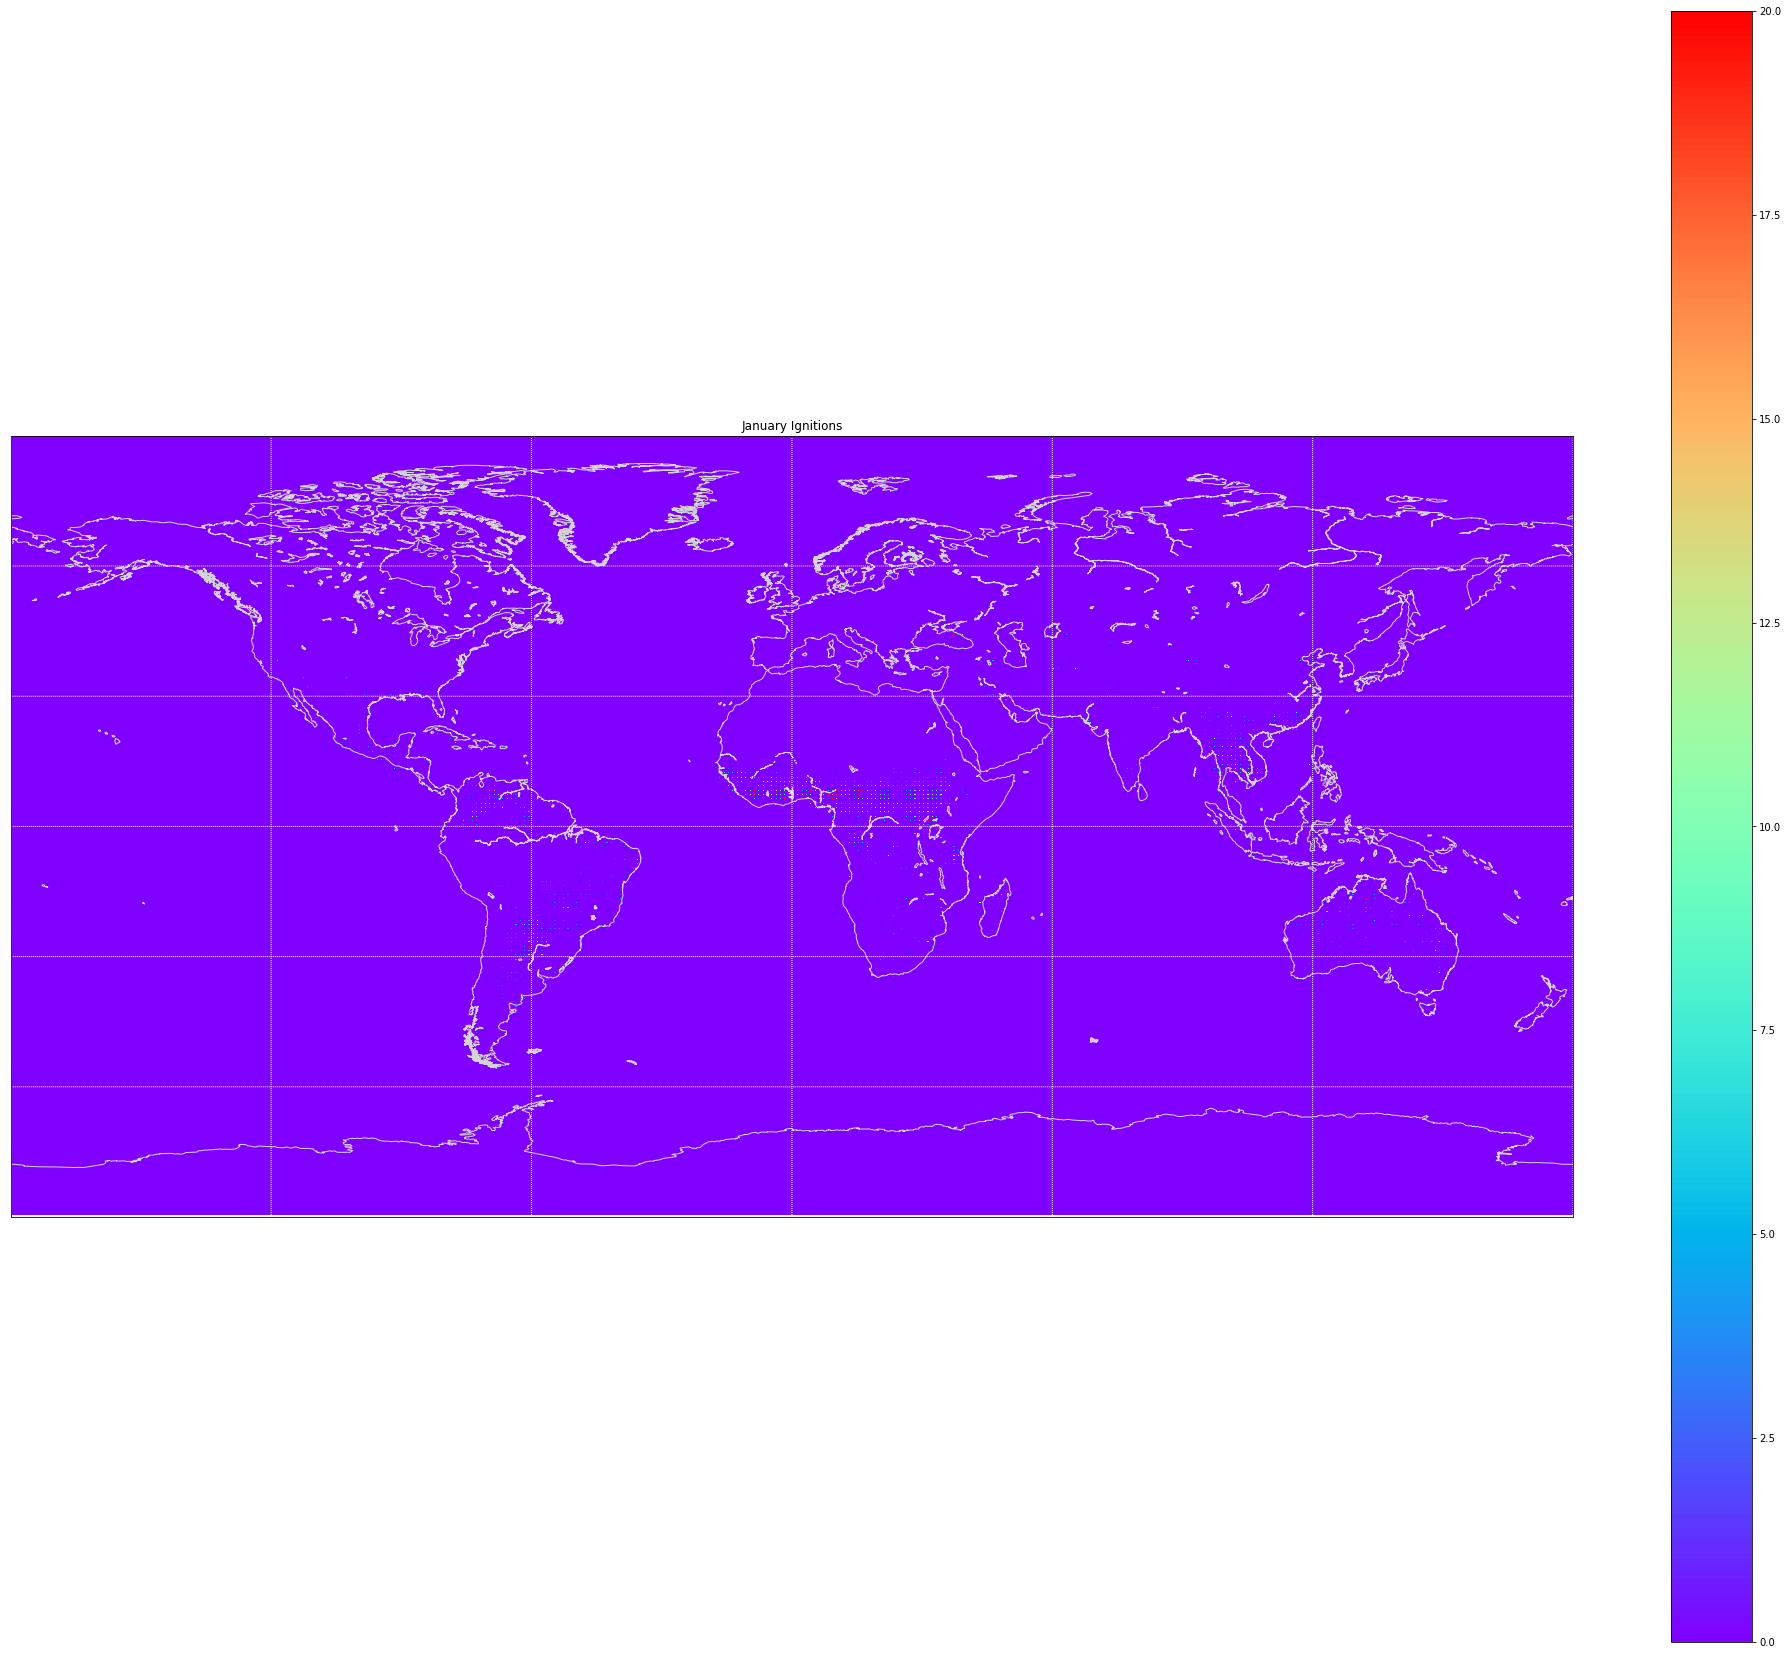

In [31]:
#from matplotlib.pyplot import rainbow_r
fig = plt.figure(figsize=(35,30), edgecolor='w')
map = Basemap(projection='cyl',resolution='l',llcrnrlat=-90,urcrnrlat=90,
            llcrnrlon=-180,urcrnrlon=180)
#map.pcolormesh(lons,lats,grid,latlon = True)
map.pcolormesh(lons,lats,grid,vmax=20,cmap = 'rainbow')#Capping it at 20, to see better
map.drawcoastlines(color='lightgray')
map.drawparallels(np.arange(-90.,91.,30.),color='white')
map.drawmeridians(np.arange(-180.,181.,60.),color='white')
plt.title("January Ignitions")
plt.colorbar()
plt.show()

<AxesSubplot:>

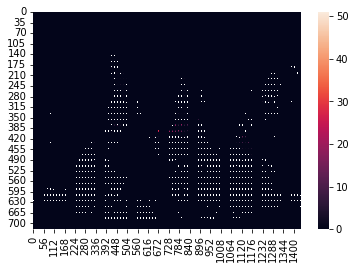

In [14]:
import seaborn as sns
sns.heatmap(grid)

In [16]:
np.any(np.isnan(grid))

True

In [39]:
import numpy as np
arr = np.reshape(np.arange(30),(5,6))
arr

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29]])

In [40]:
arr = arr.astype(float, copy = False)
arr

array([[ 0.,  1.,  2.,  3.,  4.,  5.],
       [ 6.,  7.,  8.,  9., 10., 11.],
       [12., 13., 14., 15., 16., 17.],
       [18., 19., 20., 21., 22., 23.],
       [24., 25., 26., 27., 28., 29.]])

In [41]:
from math import nan
arr[4,3] = nan

In [42]:
arr

array([[ 0.,  1.,  2.,  3.,  4.,  5.],
       [ 6.,  7.,  8.,  9., 10., 11.],
       [12., 13., 14., 15., 16., 17.],
       [18., 19., 20., 21., 22., 23.],
       [24., 25., 26., nan, 28., 29.]])

In [43]:
arr[0,1] = nan

In [44]:
arr

array([[ 0., nan,  2.,  3.,  4.,  5.],
       [ 6.,  7.,  8.,  9., 10., 11.],
       [12., 13., 14., 15., 16., 17.],
       [18., 19., 20., 21., 22., 23.],
       [24., 25., 26., nan, 28., 29.]])

In [45]:
arr[2:4,-1] = nan

In [46]:
arr

array([[ 0., nan,  2.,  3.,  4.,  5.],
       [ 6.,  7.,  8.,  9., 10., 11.],
       [12., 13., 14., 15., 16., nan],
       [18., 19., 20., 21., 22., nan],
       [24., 25., 26., nan, 28., 29.]])

In [47]:
arr[:,2] = nan

In [48]:
arr

array([[ 0., nan, nan,  3.,  4.,  5.],
       [ 6.,  7., nan,  9., 10., 11.],
       [12., 13., nan, 15., 16., nan],
       [18., 19., nan, 21., 22., nan],
       [24., 25., nan, nan, 28., 29.]])

In [49]:
arr[:,0]=nan
arr[2,0]=12

In [50]:
arr

array([[nan, nan, nan,  3.,  4.,  5.],
       [nan,  7., nan,  9., 10., 11.],
       [12., 13., nan, 15., 16., nan],
       [nan, 19., nan, 21., 22., nan],
       [nan, 25., nan, nan, 28., 29.]])

In [53]:
import numpy as np
arr = np.reshape(np.arange(30),(5,6))
arr = arr.astype(float, copy = False)
from math import nan
arr[4,3] = nan
arr[0,1] = nan
arr[2:4,-1] = nan
arr[:,2] = nan
arr[:,0]=nan
arr[2,0]=12
arr_int = np.zeros_like(arr,dtype = 'float')
test_sum = np.isnan(arr).sum(axis =0)
for i in range(arr.shape[1]):
    temp = arr[:,i]
    test = test_sum[i]
    #print(test)
    if (test == arr.shape[0]):#If all are false along a column
        arr_int[:,i]=0
    else:
        nans = np.isnan(temp)
        x = lambda z:z.nonzero()[0]
        temp[nans] = np.interp(x(nans),x(~nans),temp[~nans])
        arr_int[:,i]= temp
    #print(arr_int)
arr_int

array([[12.,  7.,  0.,  3.,  4.,  5.],
       [12.,  7.,  0.,  9., 10., 11.],
       [12., 13.,  0., 15., 16., 17.],
       [12., 19.,  0., 21., 22., 23.],
       [12., 25.,  0., 21., 28., 29.]])

In [33]:
test_sum = np.isnan(arr).sum(axis =0)
test_sum

array([0, 0, 5, 1, 0, 2])

In [61]:
arr = np.reshape(np.arange(30),(5,6))
arr = arr.astype(float, copy = False)
from math import nan
arr[4,3] = nan
arr[0,1] = nan
arr[2:4,-1] = nan
arr[:,2] = nan
arr[:,0]=nan
arr[2,0]=12
arr

array([[nan, nan, nan,  3.,  4.,  5.],
       [nan,  7., nan,  9., 10., 11.],
       [12., 13., nan, 15., 16., nan],
       [nan, 19., nan, 21., 22., nan],
       [nan, 25., nan, nan, 28., 29.]])

In [62]:
temp = arr
temp_mean = np.nanmean(arr,axis = 0)
temp_mean = np.reshape(temp_mean,(-1,1))
np.nan_to_num(temp_mean,copy= False,nan=0)
inds = np.where(np.isnan(temp))
temp[inds] = np.take(temp_mean,inds[1])
temp

/tmp/ipykernel_36223/2463324352.py:2: RuntimeWarning: Mean of empty slice
  temp_mean = np.nanmean(arr,axis = 0)


array([[12., 16.,  0.,  3.,  4.,  5.],
       [12.,  7.,  0.,  9., 10., 11.],
       [12., 13.,  0., 15., 16., 15.],
       [12., 19.,  0., 21., 22., 15.],
       [12., 25.,  0., 12., 28., 29.]])

In [63]:
temp_mean

array([[12.],
       [16.],
       [ 0.],
       [12.],
       [16.],
       [15.]])

In [59]:
temp_mean = np.nanmean(arr,axis = 0)
temp_mean.shape

/tmp/ipykernel_36223/1373469829.py:1: RuntimeWarning: Mean of empty slice
  temp_mean = np.nanmean(arr,axis = 0)


(6,)

In [11]:
arr.shape

(5, 6)

In [14]:
mask = arr==np.nan
cols = np.any(mask,axis=1)
cols

array([False, False, False, False, False])

In [15]:
mask

array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])

In [18]:
test = np.where(np.isnan(arr))
test

(array([0, 0, 1, 2, 2, 3, 3, 4, 4]), array([1, 2, 2, 2, 5, 2, 5, 2, 3]))

In [21]:
np.isnan(arr)

array([[False,  True,  True, False, False, False],
       [False, False,  True, False, False, False],
       [False, False,  True, False, False,  True],
       [False, False,  True, False, False,  True],
       [False, False,  True,  True, False, False]])

In [22]:
np.any(np.isnan(arr),axis = 0)

array([False,  True,  True,  True, False,  True])

In [23]:
np.isnan(arr).shape

(5, 6)

In [ ]:
arr_col = arr[:,-1]
a = np.arange(5).reshape((-1,1))


In [ ]:
from scipy import interpolate
def fill_nans_scipy1(padata, pkind='linear'):
    aindexes = np.arange(9)
    _,agood_indexes = np.where(np.isfinite(padata))
    f = interpolate.interp1d(agood_indexes
           , padata[agood_indexes]
           , bounds_error=False
           , copy=False
           , fill_value='extrapolate'
           , kind=pkind)
    return f(aindexes)

In [69]:
import numpy as np
x = np.arange(6)
x = x.reshape((2,3))
x


array([[0, 1, 2],
       [3, 4, 5]])

In [70]:
x.shape

(2, 3)

In [81]:
x_3d = np.repeat(x[:,:,np.newaxis],4,axis =2)

In [82]:
x_3d

array([[[0, 0, 0, 0],
        [1, 1, 1, 1],
        [2, 2, 2, 2]],

       [[3, 3, 3, 3],
        [4, 4, 4, 4],
        [5, 5, 5, 5]]])

In [83]:
x_3d.shape

(2, 3, 4)

In [38]:
import numpy as np
arr = np.reshape(np.arange(20),(5,4))
arr = arr.astype(float, copy = False)
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.],
       [16., 17., 18., 19.]])

In [62]:
from math import nan
arr[4,3] = nan
arr[0,1] = nan
arr[2:4,-1] = nan
arr[:,2] = nan
arr[:,0]=nan
arr[2,0]=12
x_3d = np.repeat(arr[:,:,np.newaxis],3,axis =2)

In [63]:
x_3d[:,0:,0]

array([[nan, nan, nan,  3.],
       [nan,  5., nan,  7.],
       [12.,  9., nan, nan],
       [nan, 13., nan, nan],
       [nan, 17., nan, nan]])

In [66]:
x_3d.shape

(5, 4, 3)

In [64]:
arr

array([[nan, nan, nan,  3.],
       [nan,  5., nan,  7.],
       [12.,  9., nan, nan],
       [nan, 13., nan, nan],
       [nan, 17., nan, nan]])

In [65]:
var_mean = np.nanmean(x_3d,axis = (2))
np.nan_to_num(var_mean,nan = 0,copy = False)
var_mean

/tmp/ipykernel_2034854/1182037506.py:1: RuntimeWarning: Mean of empty slice
  var_mean = np.nanmean(x_3d,axis = (2))


array([[ 0.,  0.,  0.,  3.],
       [ 0.,  5.,  0.,  7.],
       [12.,  9.,  0.,  0.],
       [ 0., 13.,  0.,  0.],
       [ 0., 17.,  0.,  0.]])

In [50]:
inds = np.where(np.isnan(x_3d))
inds

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4]),
 array([0, 0, 0, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 3, 3, 3, 0,
        0, 0, 2, 2, 2, 3, 3, 3, 0, 0, 0, 2, 2, 2, 3, 3, 3]),
 array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
        1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]))

In [73]:
inds[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [92]:
var_mean = np.nanmean(x_3d,axis = (2))
np.nan_to_num(var_mean,nan = 0,copy = False)
inds = np.where(np.isnan(x_3d))
x_3d[inds] = var_mean[(inds[0],inds[1])]

In [78]:
var_mean[inds[0:2]].shape

(39,)

In [79]:
np.take(var_mean,inds[0:2]).shape

(2, 39)

In [80]:
var_mean

array([[ 0.,  0.,  0.,  3.],
       [ 0.,  5.,  0.,  7.],
       [12.,  9.,  0.,  0.],
       [ 0., 13.,  0.,  0.],
       [ 0., 17.,  0.,  0.]])

In [88]:
var_mean[(2,2)]

0.0

In [81]:
inds[0:2]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4]),
 array([0, 0, 0, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 3, 3, 3, 0,
        0, 0, 2, 2, 2, 3, 3, 3, 0, 0, 0, 2, 2, 2, 3, 3, 3]))

In [22]:
var_mean
#5x4

array([[ 4.        ,  4.        ,  4.        ,  4.        ],
       [ 7.5       ,  7.5       ,  7.5       ,  7.5       ],
       [11.54166667, 11.54166667, 11.54166667, 11.54166667],
       [13.20833333, 13.20833333, 13.20833333, 13.20833333],
       [15.66666667, 15.66666667, 15.66666667, 15.66666667]])

In [24]:
var_mean
#6x4

array([[ 5.6,  5.6,  5.6,  5.6],
       [13.6, 13.6, 13.6, 13.6],
       [ 4. ,  4. ,  4. ,  4. ],
       [10.4, 10.4, 10.4, 10.4],
       [16. , 16. , 16. , 16. ],
       [12.7, 12.7, 12.7, 12.7]])

In [27]:
var_mean
#6x5

array([[ 4.  ,  4.  ,  4.  ,  3.  ,  4.  ,  5.  ],
       [ 4.  ,  7.  ,  4.  ,  9.  , 10.  , 11.  ],
       [12.  , 13.  ,  4.  , 15.  , 16.  ,  9.25],
       [ 4.  , 19.  ,  4.  , 21.  , 22.  ,  9.25],
       [ 4.  , 25.  ,  4.  ,  4.  , 28.  , 29.  ]])

In [17]:
x_3d

array([[[ 4.  ,  4.  ,  4.  ,  4.  ],
        [ 4.  ,  4.  ,  4.  ,  4.  ],
        [ 4.  ,  4.  ,  4.  ,  4.  ],
        [ 3.  ,  3.  ,  3.  ,  3.  ],
        [ 4.  ,  4.  ,  4.  ,  4.  ],
        [ 5.  ,  5.  ,  5.  ,  5.  ]],

       [[ 4.  ,  4.  ,  4.  ,  4.  ],
        [ 7.  ,  7.  ,  7.  ,  7.  ],
        [ 4.  ,  4.  ,  4.  ,  4.  ],
        [ 9.  ,  9.  ,  9.  ,  9.  ],
        [10.  , 10.  , 10.  , 10.  ],
        [11.  , 11.  , 11.  , 11.  ]],

       [[12.  , 12.  , 12.  , 12.  ],
        [13.  , 13.  , 13.  , 13.  ],
        [ 4.  ,  4.  ,  4.  ,  4.  ],
        [15.  , 15.  , 15.  , 15.  ],
        [16.  , 16.  , 16.  , 16.  ],
        [ 9.25,  9.25,  9.25,  9.25]],

       [[ 4.  ,  4.  ,  4.  ,  4.  ],
        [19.  , 19.  , 19.  , 19.  ],
        [ 4.  ,  4.  ,  4.  ,  4.  ],
        [21.  , 21.  , 21.  , 21.  ],
        [22.  , 22.  , 22.  , 22.  ],
        [ 9.25,  9.25,  9.25,  9.25]],

       [[ 4.  ,  4.  ,  4.  ,  4.  ],
        [25.  , 25.  , 25.  , 25.  ],
    

In [19]:
x_3d

array([[[ 4.  ,  4.  ,  4.  ,  4.  ],
        [ 4.  ,  4.  ,  4.  ,  4.  ],
        [ 4.  ,  4.  ,  4.  ,  4.  ],
        [ 3.  ,  3.  ,  3.  ,  3.  ],
        [ 4.  ,  4.  ,  4.  ,  4.  ],
        [ 5.  ,  5.  ,  5.  ,  5.  ]],

       [[ 4.  ,  4.  ,  4.  ,  4.  ],
        [ 7.  ,  7.  ,  7.  ,  7.  ],
        [ 4.  ,  4.  ,  4.  ,  4.  ],
        [ 9.  ,  9.  ,  9.  ,  9.  ],
        [10.  , 10.  , 10.  , 10.  ],
        [11.  , 11.  , 11.  , 11.  ]],

       [[12.  , 12.  , 12.  , 12.  ],
        [13.  , 13.  , 13.  , 13.  ],
        [ 4.  ,  4.  ,  4.  ,  4.  ],
        [15.  , 15.  , 15.  , 15.  ],
        [16.  , 16.  , 16.  , 16.  ],
        [ 9.25,  9.25,  9.25,  9.25]],

       [[ 4.  ,  4.  ,  4.  ,  4.  ],
        [19.  , 19.  , 19.  , 19.  ],
        [ 4.  ,  4.  ,  4.  ,  4.  ],
        [21.  , 21.  , 21.  , 21.  ],
        [22.  , 22.  , 22.  , 22.  ],
        [ 9.25,  9.25,  9.25,  9.25]],

       [[ 4.  ,  4.  ,  4.  ,  4.  ],
        [25.  , 25.  , 25.  , 25.  ],
    

In [21]:
x_3d

array([[[ 4.  ,  4.  ,  4.  ,  4.  ],
        [ 4.  ,  4.  ,  4.  ,  4.  ],
        [ 4.  ,  4.  ,  4.  ,  4.  ],
        [ 3.  ,  3.  ,  3.  ,  3.  ],
        [ 4.  ,  4.  ,  4.  ,  4.  ],
        [ 5.  ,  5.  ,  5.  ,  5.  ]],

       [[ 4.  ,  4.  ,  4.  ,  4.  ],
        [ 7.  ,  7.  ,  7.  ,  7.  ],
        [ 4.  ,  4.  ,  4.  ,  4.  ],
        [ 9.  ,  9.  ,  9.  ,  9.  ],
        [10.  , 10.  , 10.  , 10.  ],
        [11.  , 11.  , 11.  , 11.  ]],

       [[12.  , 12.  , 12.  , 12.  ],
        [13.  , 13.  , 13.  , 13.  ],
        [ 4.  ,  4.  ,  4.  ,  4.  ],
        [15.  , 15.  , 15.  , 15.  ],
        [16.  , 16.  , 16.  , 16.  ],
        [ 9.25,  9.25,  9.25,  9.25]],

       [[ 4.  ,  4.  ,  4.  ,  4.  ],
        [19.  , 19.  , 19.  , 19.  ],
        [ 4.  ,  4.  ,  4.  ,  4.  ],
        [21.  , 21.  , 21.  , 21.  ],
        [22.  , 22.  , 22.  , 22.  ],
        [ 9.25,  9.25,  9.25,  9.25]],

       [[ 4.  ,  4.  ,  4.  ,  4.  ],
        [25.  , 25.  , 25.  , 25.  ],
    

In [51]:
arr

array([[nan, nan, nan,  3.],
       [nan,  5., nan,  7.],
       [12.,  9., nan, nan],
       [nan, 13., nan, nan],
       [nan, 17., nan, nan]])

In [53]:
col_mean = np.nanmean(arr, axis=0)
col_mean

/tmp/ipykernel_2034854/498210192.py:1: RuntimeWarning: Mean of empty slice
  col_mean = np.nanmean(arr, axis=0)


array([12., 11., nan,  5.])

In [58]:
col_mean = np.nan_to_num(col_mean,nan =0)
col_mean

array([12., 11.,  0.,  5.])

In [59]:
inds = np.where(np.isnan(arr))
inds[1]

array([0, 1, 2, 0, 2, 2, 3, 0, 2, 3, 0, 2, 3])

In [60]:
inds

(array([0, 0, 0, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4]),
 array([0, 1, 2, 0, 2, 2, 3, 0, 2, 3, 0, 2, 3]))

In [61]:
np.take(col_mean, inds[1])

array([12., 11.,  0., 12.,  0.,  0.,  5., 12.,  0.,  5., 12.,  0.,  5.])

In [1]:
import numpy as np
mean = np.load('../../data/month_mean_loop.npy')
mean.shape

(244243, 9, 12, 38)

In [9]:
import numpy as np
test = np.load('../../data/test_sans_ocean.npy')
timesteps = 57
pixels = test.shape[0]//timesteps
temp = np.reshape(test,(pixels,-1,test.shape[1]))
block = np.zeros((pixels,3,test.shape[1]))
block[:] = np.nan

In [10]:
temp.shape

(244243, 57, 38)

In [11]:
block.shape

(244243, 3, 38)

In [12]:
type(block)

numpy.ndarray

In [13]:
test_new = np.append(temp,block,axis = 1)

In [15]:
test_new.shape

(244243, 60, 38)